觀察資料分群(使用4象、比賽結果與分數差)

In [2]:
# 只算平均不算分差
import numpy as np
import pandas as pd
df_win = pd.read_csv('Team_Goal_Data.csv')
display(df_win.columns)

Index(['match_api_id', 'team_api_id', 'team_type', 'spread', 'status', 'fire',
       'water', 'earth', 'air', 'Aries', 'Leo', 'Sagittarius', 'Cancer',
       'Scopio', 'Pisces', 'Taurus', 'Virgo', 'Capricorn', 'Gemini', 'Libra',
       'Aquarius', 'TeamGoal'],
      dtype='object')

In [23]:
# 分析一: 成員組成與分差
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 刪除不需要的欄位
df_model_1 = df_win.drop(['match_api_id', 'team_api_id'], axis=1)
df_model_1.drop(['team_type', 'Aries', 'Leo', 'Sagittarius', 'Cancer', 'Scopio', 'Pisces',
       'Taurus', 'Virgo', 'Capricorn', 'Gemini', 'Libra', 'Aquarius'], axis=1, inplace=True)
df_model_1['status'] = df_model_1['status'].map({'win': 3, 'lose': 1, 'a draw': 2})
df_model_1[['fire', 'water', 'earth', 'air']] = df_model_1[['fire', 'water', 'earth', 'air']].sub(2.75)
# df_model_1.columns
print(df_model_1.head(3))

# 選擇特徵
target_column = ['status', 'spread', 'fire', 'water', 'earth', 'air', 'TeamGoal']
X = df_model_1[target_column]
# print(X.describe())

# 標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# temp_x_scale = X_scaled
# display(df_model_1.columns)
temp_x_scale = df_model_1


# 打印修改后的 DataFrame
print(temp_x_scale)


   spread  status  fire  water  earth   air  TeamGoal
0       1       1  1.25   1.25  -1.75 -0.75         1
1       1       3 -0.75   0.25   1.25 -0.75         2
2       1       1 -0.75  -1.75   2.25  0.25         0
       spread  status  fire  water  earth   air  TeamGoal
0           1       1  1.25   1.25  -1.75 -0.75         1
1           1       3 -0.75   0.25   1.25 -0.75         2
2           1       1 -0.75  -1.75   2.25  0.25         0
3           1       3 -0.75   1.25   0.25 -0.75         1
4           3       1  0.25   1.25  -1.75  0.25         0
...       ...     ...   ...    ...    ...   ...       ...
42743       4       3 -1.75  -0.75   1.25  1.25         4
42744       4       3 -0.75   0.25  -1.75  2.25         4
42745       4       1  0.25   2.25  -0.75 -1.75         0
42746       7       1 -0.75  -1.75   1.25  1.25         0
42747       7       3  0.25  -2.75  -0.75  3.25         7

[42748 rows x 7 columns]


In [24]:
print(df_model_1['status'].value_counts())

status
1    15976
3    15976
2    10796
Name: count, dtype: int64


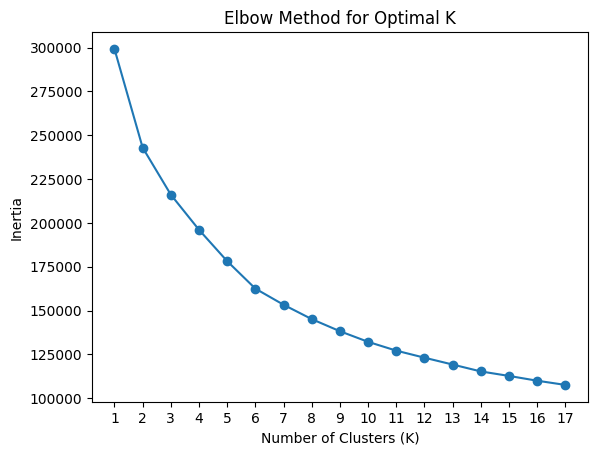

In [25]:
# 手肘法找k值
# 選擇 k 範圍 + 手肘法
max_clusters = 17
inertias = []

# 不同分群的效果
for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# 繪圖
plt.plot(range(1, max_clusters + 1), inertias, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(np.arange(1, max_clusters + 1, step=1))
plt.show()
# -> k = 6

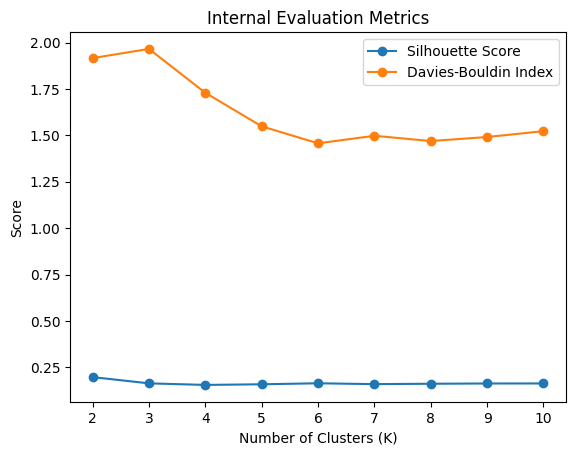

silhouette_scores: [0.19716143665165134, 0.1634426839924077, 0.15501237334083276, 0.15842540785777554, 0.1638823923653868, 0.15924766675888474, 0.1613702883804359, 0.16275633397238032, 0.16294464545386628]
davies_bouldin_scores: [1.9164618652873653, 1.965967093820803, 1.7294978938121122, 1.5488281888693851, 1.457174174134404, 1.4978322432764417, 1.4694236963023555, 1.4911654267445669, 1.5226827680475592]


In [27]:
# 內部評估指標(母體)
from sklearn.metrics import silhouette_score, davies_bouldin_score

silhouette_scores = []
davies_bouldin_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))
    davies_bouldin_scores.append(davies_bouldin_score(X_scaled, kmeans.labels_))

# 繪製 Silhouette Score 和 Davies-Bouldin Index
plt.plot(k_values, silhouette_scores, marker='o', label='Silhouette Score')
plt.plot(k_values, davies_bouldin_scores, marker='o', label='Davies-Bouldin Index')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Score')
plt.legend()
plt.title('Internal Evaluation Metrics')
plt.show()

# 印出評估值(母體):
print('silhouette_scores:', silhouette_scores)
print('davies_bouldin_scores:', davies_bouldin_scores)

In [28]:
# 觀察分群效果
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

kmeansModel = KMeans(n_clusters=6, random_state=42, n_init=10)
clusters_pred = kmeansModel.fit_predict(X_scaled)
labels = kmeansModel.labels_
centroids = kmeansModel.cluster_centers_
print('kmeansModel.labels_', kmeansModel.labels_)
db_index = davies_bouldin_score(X_scaled, labels)
print(f"Davies-Bouldin Index: {db_index}")
silhouette_avg = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {silhouette_avg}")

# 計算 Calinski-Harabasz Index
calinski_harabasz_score_6 = calinski_harabasz_score(X_scaled, labels)
print(f"Calinski-Harabasz Index (k=6): {calinski_harabasz_score_6}")

kmeansModel.labels_ [0 3 3 ... 0 5 1]
Davies-Bouldin Index: 1.457174174134404
Silhouette Score: 0.1638823923653868
Calinski-Harabasz Index (k=6): 7193.072890543772


In [29]:
# 多label問題檢查
# k=6 的情況
kmeansModel = KMeans(n_clusters=6, random_state=42, n_init=10)
clusters_pred_k6 = kmeansModel.fit_predict(X_scaled)
labels_k6 = kmeansModel.labels_
print('kmeansModel.labels_ (k=6):', labels_k6)

kmeansModel.labels_ (k=6): [0 3 3 ... 0 5 1]


Principal Component 1: 0.2453
0.24525227520720277
Principal Component 2: 0.1990
0.44423619046720286
Principal Component 3: 0.1892
0.6334746779921986
Principal Component 4: 0.1830
0.8165049574258602
Principal Component 5: 0.1428
0.9592565172422683
Principal Component 6: 0.0407
0.9999999999999999
Principal Component 7: 0.0000
0.9999999999999999


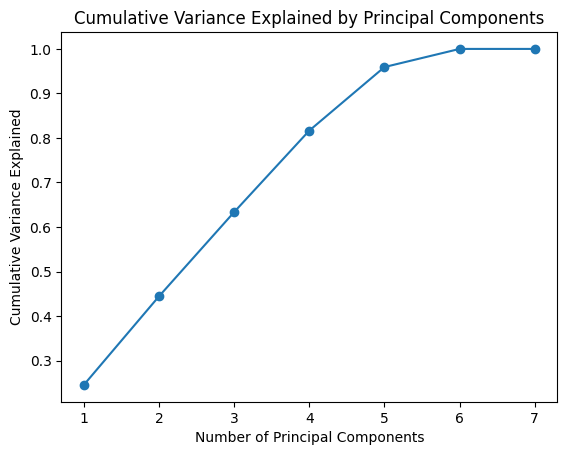

In [30]:
# 降維觀察
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 初始化PCA，不指定降維後的維度
pca = PCA()

# 進行PCA轉換
X_pca = pca.fit_transform(X_scaled)

# 獲取每個主成分的方差解釋比例
explained_variance_ratio = pca.explained_variance_ratio_
# 選擇維度: 累計方差貢獻率
a=0

for i, ratio in enumerate(explained_variance_ratio):
    print(f"Principal Component {i + 1}: {ratio:.4f}")
    a = a + ratio
    print(a)

# 繪製方差解釋比例的累積圖
cumulative_variance_ratio = explained_variance_ratio.cumsum()
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.title('Cumulative Variance Explained by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.show()

0        0
1        3
2        3
3        0
4        5
        ..
42743    1
42744    1
42745    0
42746    5
42747    1
Name: Cluster, Length: 42748, dtype: int32


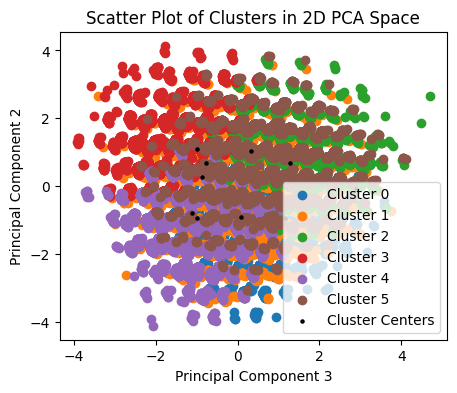

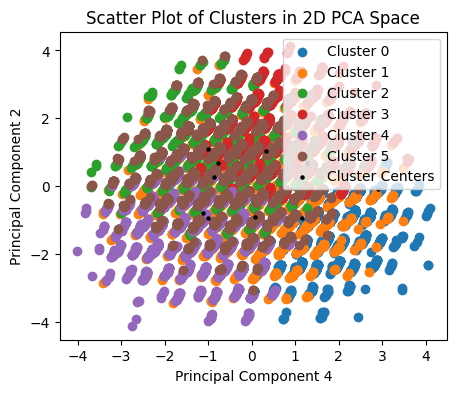

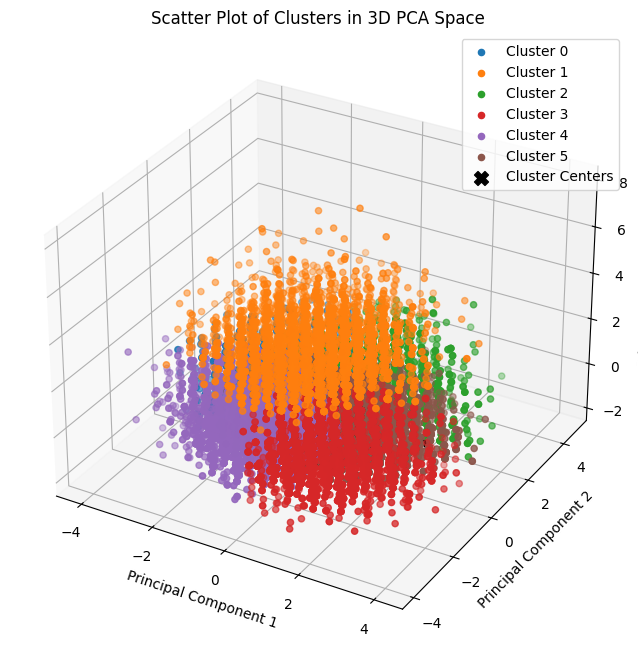

In [33]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 假設 X 是你的數據
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

# 新增一列 'Cluster' 來儲存每個樣本所屬的群
X_with_labels = pd.DataFrame(X_pca, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3', 'Principal Component 4'])
X_with_labels['Cluster'] = labels_k6
print(X_with_labels['Cluster'])

# 使用不同顏色的散點圖表示每個群
plt.figure(figsize=(5, 4))
for cluster_label in range(6):
    cluster_data = X_with_labels[X_with_labels['Cluster'] == cluster_label]
    plt.scatter(cluster_data['Principal Component 3'], cluster_data['Principal Component 2'], label=f'Cluster {cluster_label}')
# 標示群中心
cluster_centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=5, c='black', marker='o', label='Cluster Centers')
plt.title('Scatter Plot of Clusters in 2D PCA Space')
plt.xlabel('Principal Component 3')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


# 使用不同顏色的散點圖表示每個群
plt.figure(figsize=(5, 4))
for cluster_label in range(6):
    cluster_data = X_with_labels[X_with_labels['Cluster'] == cluster_label]
    plt.scatter(cluster_data['Principal Component 4'], cluster_data['Principal Component 2'], label=f'Cluster {cluster_label}')
# 標示群中心
cluster_centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=5, c='black', marker='o', label='Cluster Centers')
plt.title('Scatter Plot of Clusters in 2D PCA Space')
plt.xlabel('Principal Component 4')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# 使用不同顏色的散點圖表示每個群
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for cluster_label in range(6):
    cluster_data = X_with_labels[X_with_labels['Cluster'] == cluster_label]
    ax.scatter(cluster_data['Principal Component 2'], cluster_data['Principal Component 3'], cluster_data['Principal Component 1'], label=f'Cluster {cluster_label}')

# 標示群中心
cluster_centers = pca.transform(kmeans.cluster_centers_)
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], cluster_centers[:, 2], s=100, c='black', marker='X', label='Cluster Centers')

ax.set_title('Scatter Plot of Clusters in 3D PCA Space')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.show()

C:\Users\lian\AppData\Local\Temp\ipykernel_28892\4049117175.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=X_with_labels["Cluster"], palette=palette)


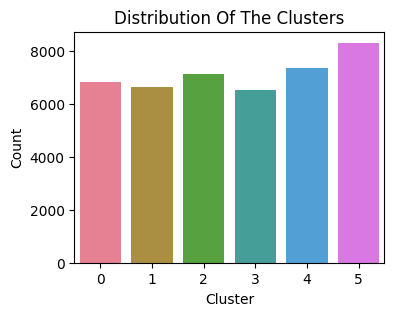

In [35]:
# 觀察分群資料數量
import seaborn as sns
import matplotlib.pyplot as plt

# 生成柔和的顏色調色板
n_clusters = 6
palette = sns.color_palette("husl", n_clusters)

# 繪製 countplot
plt.figure(figsize=(4, 3))
sns.countplot(x=X_with_labels["Cluster"], palette=palette)
plt.title("Distribution Of The Clusters")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()


c:\Users\lian\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


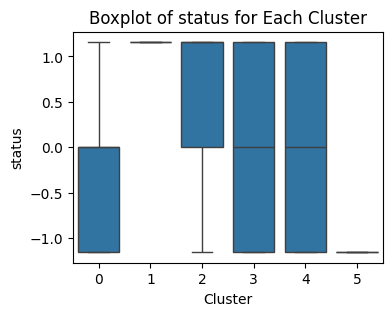

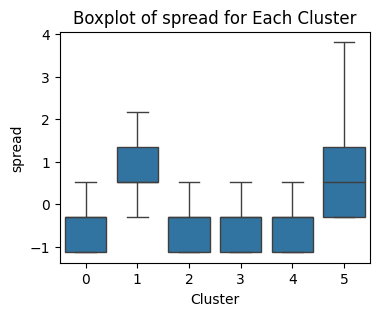

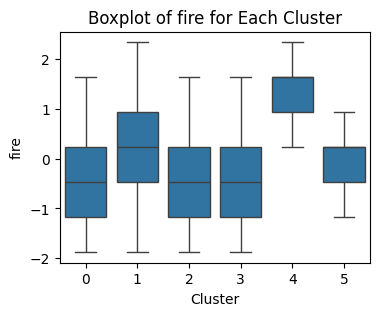

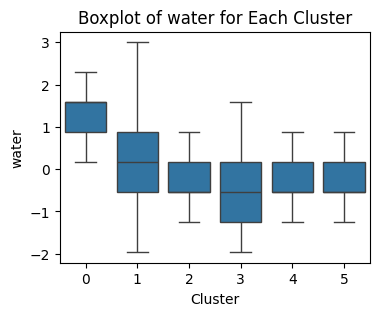

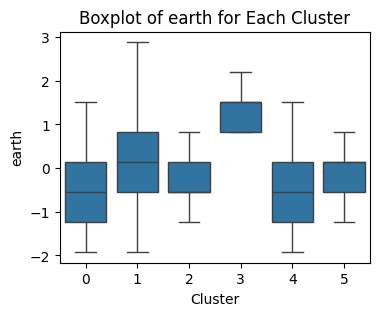

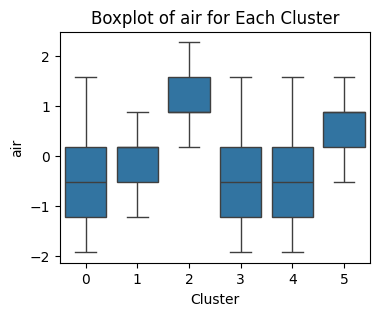

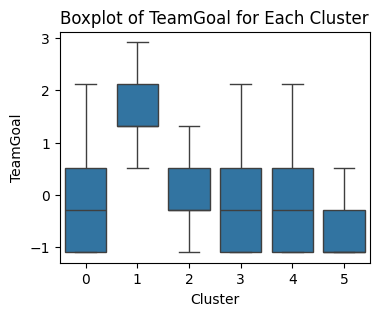

In [42]:
# 觀察每群各參數特徵
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

kmeansModel = KMeans(n_clusters=6, random_state=42)
clusters_pred = kmeansModel.fit_predict(X_scaled)
labels = kmeansModel.labels_

# 将聚类结果和原始数据合并
df_with_clusters = pd.concat([pd.DataFrame(X_scaled, columns=['status', 'spread', 'fire', 'water', 'earth', 'air', 'TeamGoal']),
                              pd.DataFrame({'Cluster': labels})], axis=1)


# 绘制箱型图
plt.figure(figsize=(4, 3))
sns.boxplot(data=df_with_clusters, x='Cluster', y='status', showfliers=False)
plt.title('Boxplot of status for Each Cluster')
plt.show()

# 绘制箱型图
plt.figure(figsize=(4, 3))
sns.boxplot(data=df_with_clusters, x='Cluster', y='spread', showfliers=False)
plt.title('Boxplot of spread for Each Cluster')
plt.show()

# 绘制箱型图
plt.figure(figsize=(4, 3))
sns.boxplot(data=df_with_clusters, x='Cluster', y='fire', showfliers=False)
plt.title('Boxplot of fire for Each Cluster')
plt.show()

# 绘制箱型图
plt.figure(figsize=(4, 3))
sns.boxplot(data=df_with_clusters, x='Cluster', y='water', showfliers=False)
plt.title('Boxplot of water for Each Cluster')
plt.show()

# 绘制箱型图
plt.figure(figsize=(4, 3))
sns.boxplot(data=df_with_clusters, x='Cluster', y='earth', showfliers=False)
plt.title('Boxplot of earth for Each Cluster')
plt.show()

# 绘制箱型图
plt.figure(figsize=(4, 3))
sns.boxplot(data=df_with_clusters, x='Cluster', y='air', showfliers=False)
plt.title('Boxplot of air for Each Cluster')
plt.show()

# 绘制箱型图
plt.figure(figsize=(4, 3))
sns.boxplot(data=df_with_clusters, x='Cluster', y='TeamGoal', showfliers=False)
plt.title('Boxplot of TeamGoal for Each Cluster')
plt.show()


c:\Users\lian\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Figure size 2000x2000 with 0 Axes>

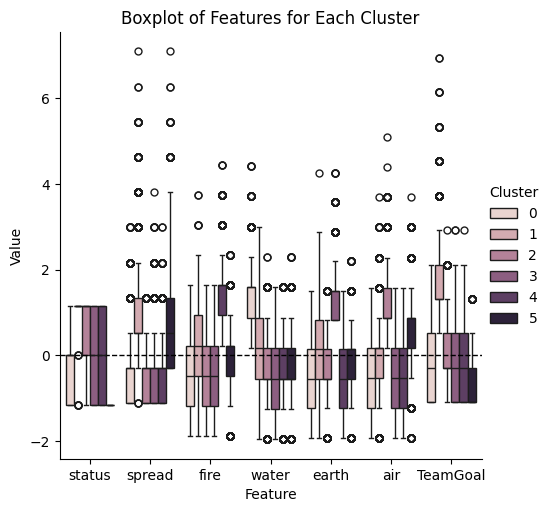

In [50]:
# 觀察各群特徵
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 假设 X_scaled 是你的特征矩阵
# X_scaled = ...

# 假设你已经有了 kmeansModel
kmeansModel = KMeans(n_clusters=6, random_state=42)
clusters_pred = kmeansModel.fit_predict(X_scaled)
labels = kmeansModel.labels_

# 将聚类结果和原始数据合并
df_with_clusters = pd.concat([pd.DataFrame(X_scaled, columns=['status', 'spread', 'fire', 'water', 'earth', 'air', 'TeamGoal']),
                              pd.DataFrame({'Cluster': labels})], axis=1)

# Melt DataFrame，以便使用 seaborn 的 catplot
melted_df = pd.melt(df_with_clusters, id_vars=['Cluster'], var_name='Feature', value_name='Value')


n_clusters = 6
palette = sns.color_palette("husl", n_clusters)
# 使用 catplot 绘制箱型图
plt.figure(figsize=(20, 20))
sns.catplot(data=melted_df, x='Feature', y='Value', hue='Cluster', kind='box')
plt.title('Boxplot of Features for Each Cluster')

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.show()


c:\Users\lian\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Figure size 2000x2000 with 0 Axes>

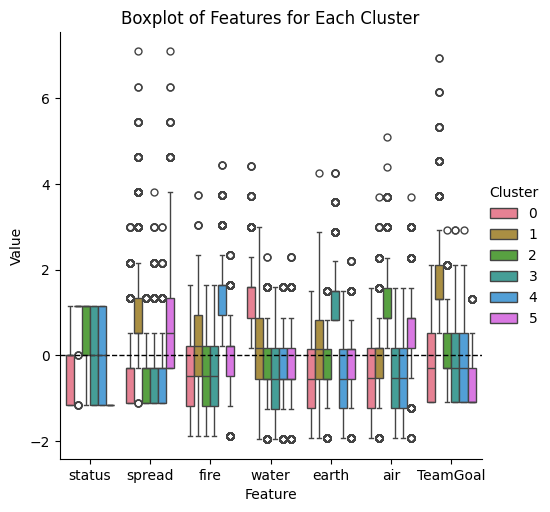

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 假设 X_scaled 是你的特征矩阵
# X_scaled = ...

# 假设你已经有了 kmeansModel
kmeansModel = KMeans(n_clusters=6, random_state=42)
clusters_pred = kmeansModel.fit_predict(X_scaled)
labels = kmeansModel.labels_

# 将聚类结果和原始数据合并
df_with_clusters = pd.concat([pd.DataFrame(X_scaled, columns=['status', 'spread', 'fire', 'water', 'earth', 'air', 'TeamGoal']),
                              pd.DataFrame({'Cluster': labels})], axis=1)

# Melt DataFrame，以便使用 seaborn 的 catplot
melted_df = pd.melt(df_with_clusters, id_vars=['Cluster'], var_name='Feature', value_name='Value')

n_clusters = 6
palette = sns.color_palette("husl", n_clusters)

# 绘制箱型图
plt.figure(figsize=(20, 20))
sns.catplot(data=melted_df, x='Feature', y='Value', hue='Cluster', palette=palette, kind='box')
plt.title('Boxplot of Features for Each Cluster')

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.show()


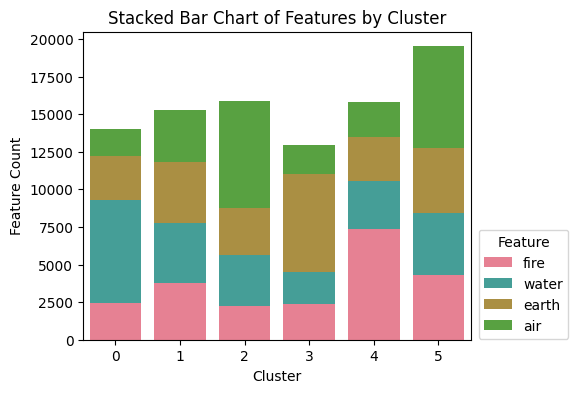

In [38]:
# 觀察各群四象特徵
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# 假設 labels_k6 包含每個樣本所屬的 cluster
# 假設 labels_k6 是 NumPy 陣列

# 將 labels_k6 轉換為 Pandas 的 Series
cluster_series = pd.Series(labels_k6, name='Cluster')

# 將 cluster_series 與 temp_df 合併
merged_df = pd.concat([cluster_series, temp_df[['fire', 'water', 'earth', 'air']]], axis=1)

# 計算每個 cluster 中 'fire', 'water', 'earth', 'air' 的樣本數
cluster_counts = merged_df.groupby('Cluster').apply(lambda x: x[x > 0].count())
cluster_counts_temp = cluster_counts.drop('Cluster', axis=1)
row_sum = cluster_counts_temp.sum(axis=1)


# 設定圖表的大小
plt.figure(figsize=(5, 4))
# 使用 Seaborn 的 barplot 來繪製 stack bar chart
sns.barplot(data=cluster_counts, x=cluster_counts.index, y='fire', color=palette[0], label='fire')
sns.barplot(data=cluster_counts, x=cluster_counts.index, y='water', color=palette[3], bottom=cluster_counts['fire'], label='water')
sns.barplot(data=cluster_counts, x=cluster_counts.index, y='earth', color=palette[1], bottom=cluster_counts['fire'] + cluster_counts['water'], label='earth')
sns.barplot(data=cluster_counts, x=cluster_counts.index, y='air', color=palette[2], bottom=cluster_counts['fire'] + cluster_counts['water'] + cluster_counts['earth'], label='air')
# 加入標題與標籤
plt.title("Stacked Bar Chart of Features by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Feature Count")
# 顯示圖例
plt.legend(bbox_to_anchor=(1.27, 0.38),title='Feature', loc='upper right')
# plt.legend(/, loc='upper left')
# 顯示圖表
plt.show()